# Weighted Mean
Calculating a latitude weighted mean

In [2]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [6]:
xr.set_options(display_expand_attrs=False)

In [7]:
ds = xr.tutorial.open_dataset( "air_temperature", chunks={"lat": "auto","lon": 25,"time": -1,})
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes: (5)

In [9]:
# Lat weights
weights = np.cos(np.deg2rad(ds.lat))
weights.name = 'weights'
weights

<xarray.DataArray 'weights' (lat: 25)>
array([0.25881907, 0.30070582, 0.34202015, 0.38268346, 0.42261827,
       0.4617486 , 0.49999997, 0.5372996 , 0.57357645, 0.6087614 ,
       0.6427876 , 0.67559016, 0.70710677, 0.7372773 , 0.76604444,
       0.7933533 , 0.81915206, 0.8433914 , 0.8660254 , 0.8870108 ,
       0.90630776, 0.9238795 , 0.9396926 , 0.95371693, 0.9659258 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes: (4)

In [11]:
# Calculating the weighted mean.
ds_weighed_mean = ds.weighted(weights).mean(dim = ['lat','lon'])
ds_weighed_mean

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 dask.array<chunksize=(2920,), meta=np.ndarray>

In [12]:
# Calculating the regular mean.
ds_regular_mean = ds.mean(dim = ['lat','lon'])
ds_regular_mean

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 dask.array<chunksize=(2920,), meta=np.ndarray>

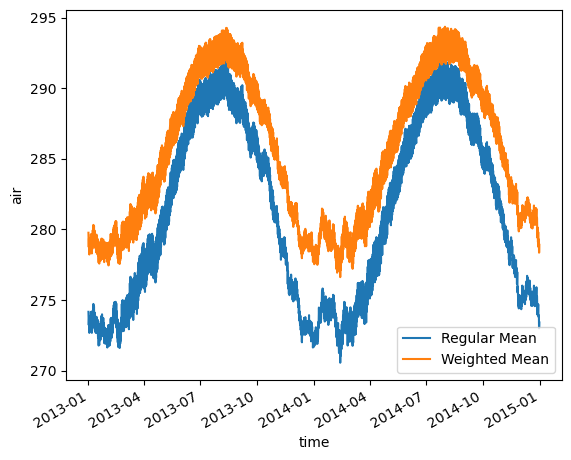

In [17]:
ds_regular_mean.air.plot(label='Regular Mean')
ds_weighed_mean.air.plot(label='Weighted Mean')
plt.legend()